In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

# Ejercicio 1
Descargue el dataset adjunto **preu lloguer per trimestre i barri.csv** extraído de la web OpenDataBCN y resúmela estadísticamente y gráficamente.

Cree al menos una visualización por:

* Una variable categórica (Distrito o Barrio)
* Una variable numérica (Precio)
* Una variable numérica y una categórica (Distrito y Precio)
* Dos variables numéricas (Año o Trimestre y Precio)
* Tres variables (Barrio o Distrito, Trimestre y Precio)

# Solución

1. Leer dataset

In [78]:
df_lloguer=pd.read_csv('preu lloguer per trimestre i barri.csv')
df_lloguer

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
...,...,...,...,...,...,...,...,...
579,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
580,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
581,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8
582,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7


Se puede ver que el precio del alquiler está expresado en  (**Euros/mes**) y (**Euros/m2 mes**). Para este estudio se utilizará la condición **Lloguer_mitja=Lloguer mitjà mensual (Euros/mes)**.

In [79]:
df=df_lloguer[df_lloguer['Lloguer_mitja']=='Lloguer mitjà mensual (Euros/mes)']
df

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
...,...,...,...,...,...,...,...,...
506,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà mensual (Euros/mes),1205.3
507,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà mensual (Euros/mes),700.5
508,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà mensual (Euros/mes),977.8
509,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà mensual (Euros/mes),826.2


2. Obtener información de nuestras variables

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 0 to 510
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             292 non-null    int64 
 1   Trimestre       292 non-null    int64 
 2   Codi_Districte  292 non-null    int64 
 3   Nom_Districte   292 non-null    object
 4   Codi_Barri      292 non-null    int64 
 5   Nom_Barri       292 non-null    object
 6   Lloguer_mitja   292 non-null    object
 7   Preu            292 non-null    object
dtypes: int64(4), object(4)
memory usage: 20.5+ KB


* Convertir la variable **Preu** a **float**

In [81]:
df['Preu'] = pd.to_numeric(df['Preu'], errors='coerce')
df[['Preu']].head(3)

,Preu
0,759.2
1,929.6
2,808.9


In [82]:
df.describe().round(2)

,Any,Trimestre,Codi_Districte,Codi_Barri,Preu
count,292.0,292.00,292.00,292.00,270.00
mean,2021.0,2.50,6.25,37.00,871.59
std,0.0,1.12,2.79,21.11,221.19
min,2021.0,1.00,1.00,1.00,447.50
25%,2021.0,1.75,4.00,19.00,742.47
50%,2021.0,2.50,7.00,37.00,816.35
75%,2021.0,3.25,8.00,55.00,934.53
max,2021.0,4.00,10.00,73.00,1816.50


In [83]:
df['Any'].unique()

array([2021])

El estudio de los alquileres en Barcelona solo se ha realizado para el año 2021.

## Gŕaficos

### 1.1 Una variable categórica (Distrito o Barrio)

In [84]:
df_Nom_Districte=df.groupby(['Nom_Districte'])['Nom_Districte'].count()
df_Nom_Districte

Nom_Districte
Ciutat Vella           16
Eixample               24
Gràcia                 20
Horta-Guinardó         44
Les Corts              12
Nou Barris             52
Sant Andreu            28
Sant Martí             40
Sants-Montjuïc         32
Sarrià-Sant Gervasi    24
Name: Nom_Districte, dtype: int64

In [23]:
#df_Nom_Districte.plot(kind='barh',color='purple')
#plt.show()

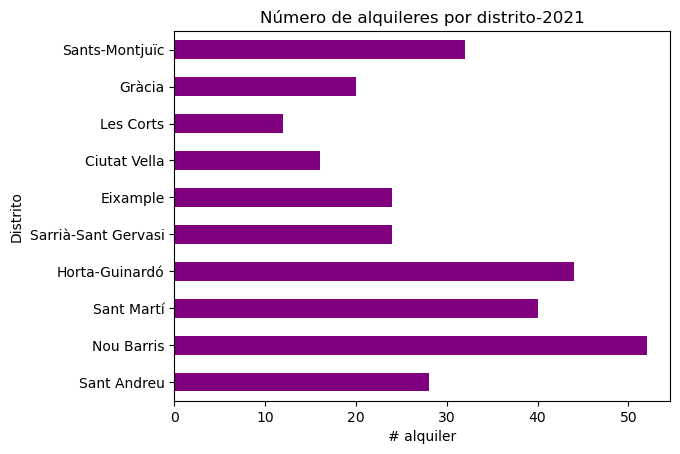

In [85]:
df['Nom_Districte'].value_counts(sort=False).plot(kind='barh',color='purple')
plt.title('Número de alquileres por distrito-2021')
plt.ylabel('Distrito')
plt.xlabel('# alquiler')
plt.savefig('categórica.png', bbox_inches='tight'); 
          

### 1.2. Una variable numérica (Precio)

In [31]:
#nbins=round((df['Preu'].max()-df['Preu'].min())/np.sqrt(len(df['Preu'])))
#plt.hist(df['Preu'], bins=10)
#plt.show()

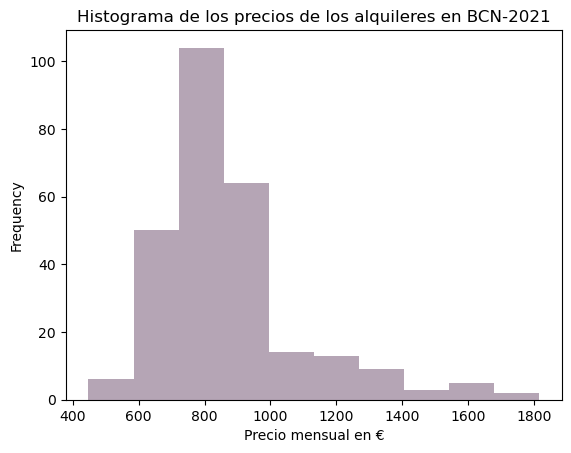

In [87]:
df.Preu.plot(kind='hist',color='#b5a5b5')
plt.title('Histograma de los precios de los alquileres en BCN-2021')
plt.xlabel('Precio mensual en €')
plt.savefig('numérica.png', bbox_inches='tight');

### 1.3. Una variable numérica y una categórica (Distrito y Precio)

In [88]:
df_Dis_Preu=df.groupby('Nom_Districte')[['Preu']].mean()
df_Dis_Preu.round(2)

,Preu
Nom_Districte,
Ciutat Vella,858.92
Eixample,1000.55
Gràcia,877.27
Horta-Guinardó,765.01
Les Corts,1214.07
Nou Barris,664.29
Sant Andreu,721.20
Sant Martí,916.45
Sants-Montjuïc,798.93


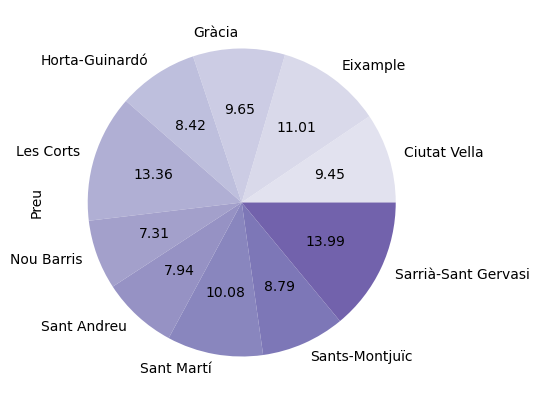

In [89]:
plt.figure()
mycolors = plt.get_cmap('Purples')(np.linspace(0.2,0.7, len(df_Dis_Preu['Preu'])))
df_Dis_Preu['Preu'].plot.pie(figsize=(5,5),autopct='%.2f',colors= mycolors)
plt.savefig('categórica_numérica.png', bbox_inches='tight')
plt.show()

* Se puede ver en el gráfico que el precio medio de alquier más caro en el 2021 es el de **Sarrià-Sant Gervasi** y el menos costoso en **Nou Barris**.

### 1.4. Dos variables numéricas (Año o Trimestre y Precio)

In [98]:
df_Tri_Preu=df.groupby('Trimestre')[['Preu']].max()
df_Tri_Preu.round(2)

,Preu
Trimestre,
1,1598.2
2,1680.3
3,1816.5
4,1679.3


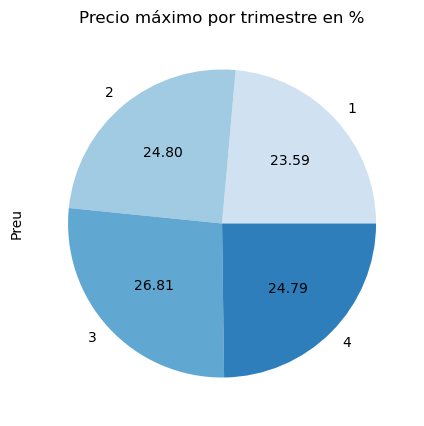

In [99]:
plt.figure()
colors = plt.get_cmap('Blues')(np.linspace(0.2,0.7, len(df_Tri_Preu['Preu'])))
df_Tri_Preu['Preu'].plot.pie(figsize=(5,5),autopct='%.2f',colors= colors)
plt.title('Precio máximo por trimestre en %')
plt.savefig('dos_numéricas.png', bbox_inches='tight');
plt.show()


Se puede ver que el precio máximo del alquiler se alcanzo en el tercer trimestre del 2021

### 1.5 Tres variables (Barrio o Distrito, Trimestre y Precio)

In [25]:
#df.Nom_Barri.unique()

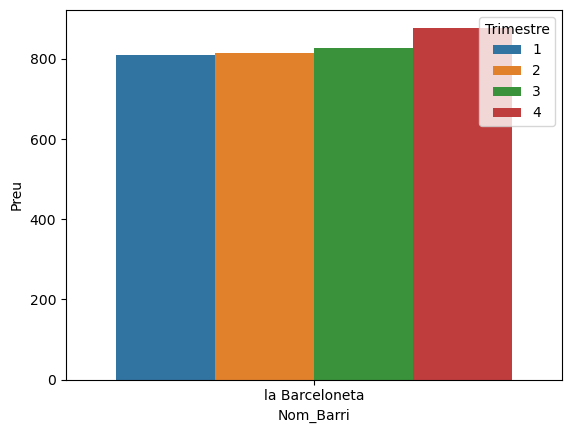

In [128]:
sns.barplot(x='Nom_Barri', y='Preu', hue='Trimestre', data=df[df['Nom_Barri']=='la Barceloneta'])
plt.savefig('1categórica_2numéricas.png', bbox_inches='tight');

Se ha trazado el precio de los alquileres en el eje *y*, y en el eje *x* el nombre del Barrio con representación para cada trimestre. Podemos ver que el precio promedio para los cuatro trimestres en la Barceloneta oscila entre los 800€. El parámetro **hue** nos permite trazar individualmente los valores categóricos en colores separados.

# Ejercicio 2
Exporte los gráficos como imágenes o como HTML.

# Ejercicio 3
Proponga alguna visualización que crea que puede resultar interesante.

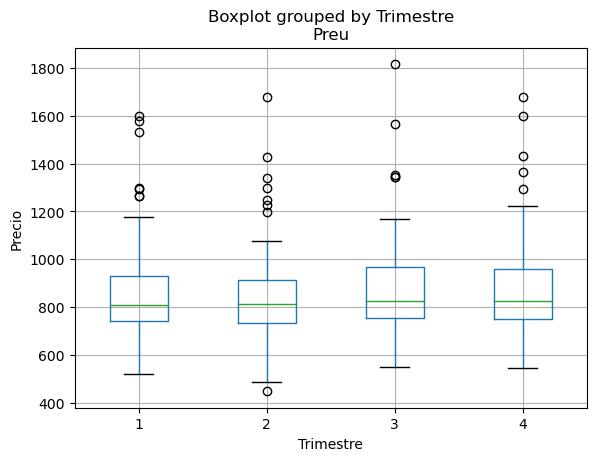

In [96]:
df.boxplot(by='Trimestre',column='Preu')
plt.ylabel('Precio');

* Se puede ver que las medianas de los precios de alquiler en los 4 trimestres están por encima de los 800€. Además, Q1 son muy similares. Además, el alquiler más caro sucedio en el $3^{er}$  trimestre de 2021. Por último, los cuatro trimestres presentan valoreas atípicos por encima del bigote de Q3, en el segundo trimestre se ve un valor atípico por debajo del bigote de Q1.